## Part 7
실시간 비명 감지 시스템 with Pytorch Project

In [2]:
!pip install librosa


In [3]:
!pip install sounddevice

In [4]:
import librosa
from matplotlib import pyplot as plt
import sounddevice as sd

In [5]:
example_file_path = librosa.ex('trumpet')
print(f'파일 위치: {example_file_path}')

파일 위치: C:\Users\JaeJunChoi\AppData\Local\librosa\librosa\Cache\sorohanro_-_solo-trumpet-06.ogg


C:\Users\JaeJunChoi\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


# Amplitude 벡터 생성
-> y는 소리 벡터, sr은 Sampling Rate

-> y = 신호 진폭 값, sr = 초당 신호 값 개수

In [7]:
y, sr = librosa.load(example_file_path)

In [8]:
sd.play(y)

In [9]:
print(f'y: {y}\nsampling rate : {sr}')

y: [-1.40682457e-03 -4.46077698e-04 -4.10981564e-04 ...  7.96230779e-06
 -3.04169989e-05  1.27650665e-05]
sampling rate : 22050


# 1초에 22,050개의 Amplitude가 존재

In [11]:
print(f'y는 {len(y)} 길이 벡터이다.')

y는 117601 길이 벡터이다.


In [12]:
print(f'y의 벡터 값 20개 출력 = {y[:20]}')

y의 벡터 값 20개 출력 = [-1.4068246e-03 -4.4607770e-04 -4.1098156e-04  9.9922603e-05
  4.3147978e-05 -1.7485370e-04 -3.6783644e-04  1.4553108e-04
  5.0557696e-04  1.4929977e-03  1.8555233e-03  9.2913560e-04
 -4.0743421e-04 -2.0390274e-03 -1.2686799e-03 -5.3472869e-04
  8.9941692e-04  9.7593718e-04  1.0020013e-03 -1.2960774e-03]


# y가 몇 초 데이터인가
= len(y) / sampling rate

In [14]:
print(f'y는 {len(y) / sr} 초이다.')

y는 5.333378684807256 초이다.


In [15]:
x = [i / sr for i in range(len(y))]

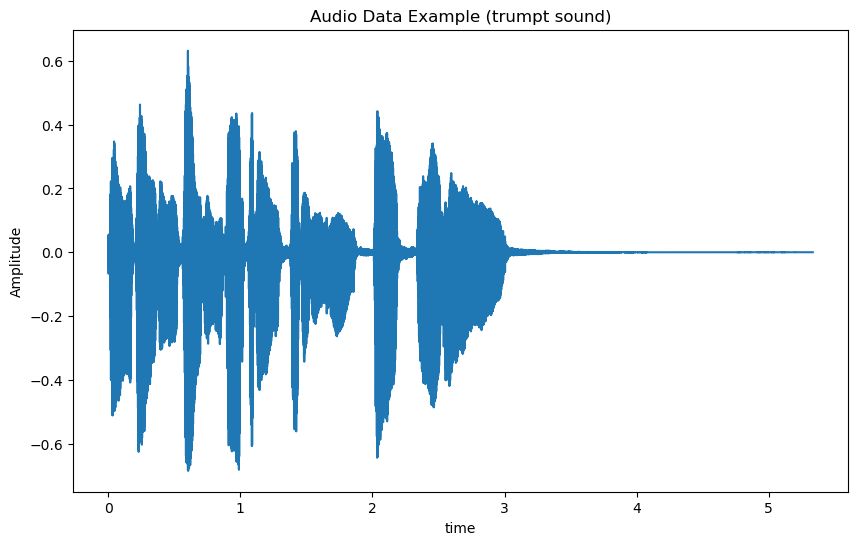

In [16]:
plt.figure(figsize=(10,6))
plt.plot(x,y) #x=시간(초), y=진폭
plt.title('Audio Data Example (trumpt sound)')
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.show()

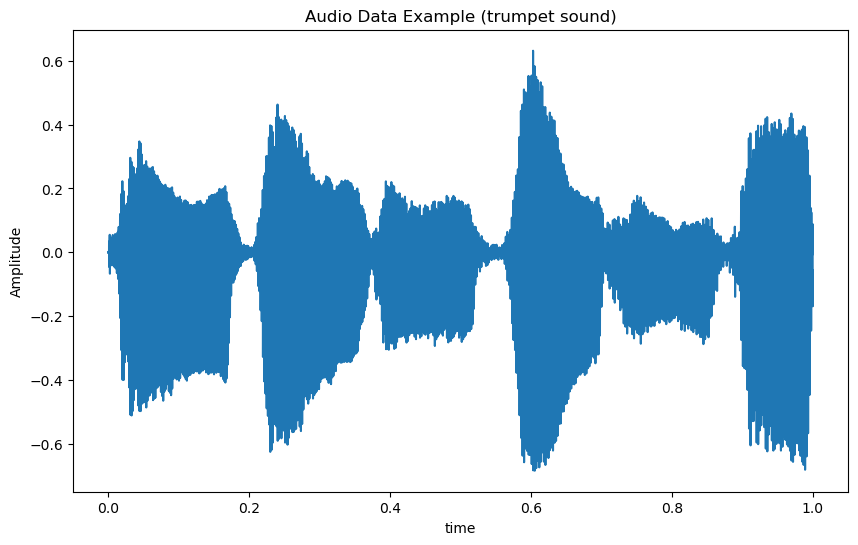

In [17]:
# 1초까지 시각화 확대 작업

import numpy as np

# y 데이터의 최소 및 최대 값을 계산
y_min, y_max = np.min(y[:sr]), np.max(y[:sr])

plt.figure(figsize=(10, 6))
plt.plot(x[:sr], y[:sr])
plt.title('Audio Data Example (trumpet sound)')
plt.xlabel('time')
plt.ylabel('Amplitude')

# y축 범위를 데이터의 실제 최소 및 최대 값으로 설정


plt.show()


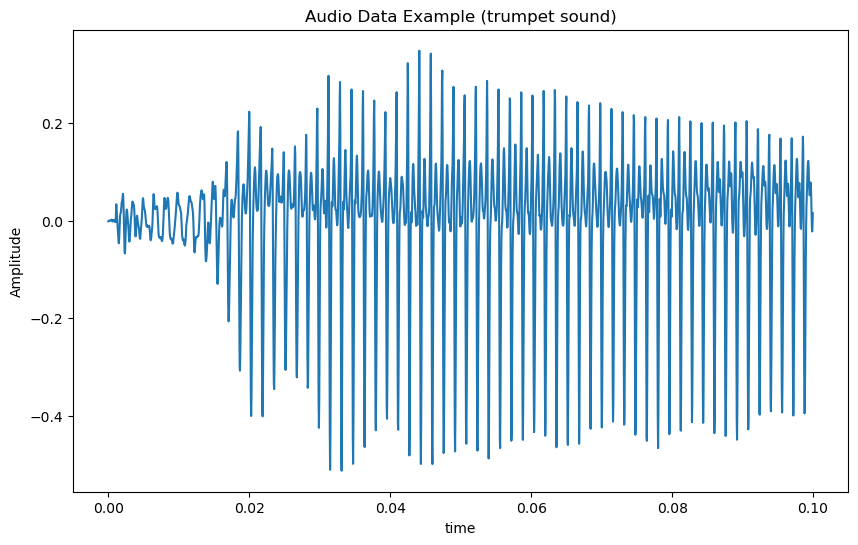

In [18]:
# 0.1초까지 시각화 확대 작업

import numpy as np

# y 데이터의 최소 및 최대 값을 계산
y_min, y_max = np.min(y[:sr]), np.max(y[:sr])


# // -> 좌항을 우항으로 나눔 + 정수형
plt.figure(figsize=(10, 6))
plt.plot(x[:sr // 10], y[:sr // 10])
plt.title('Audio Data Example (trumpet sound)')
plt.xlabel('time')
plt.ylabel('Amplitude')

# y축 범위를 데이터의 실제 최소 및 최대 값으로 설정


plt.show()


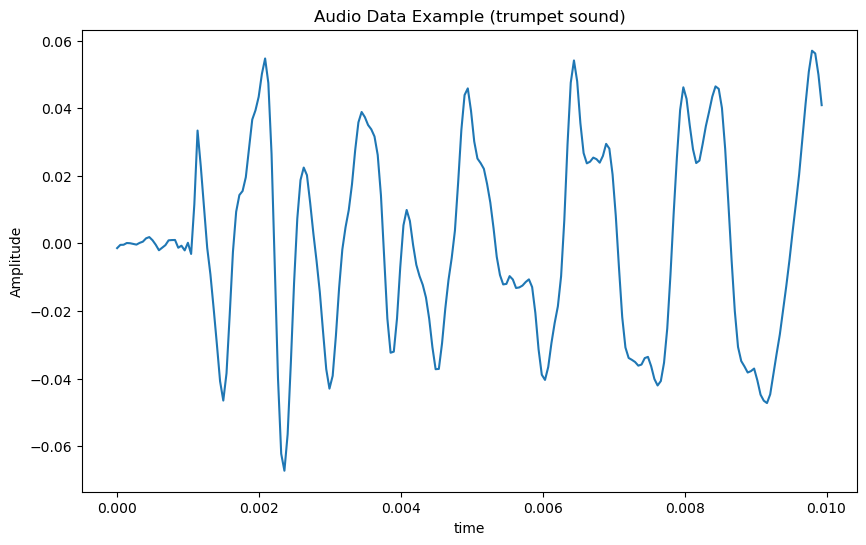

In [19]:
# 0.1초까지 시각화 확대 작업

import numpy as np

# y 데이터의 최소 및 최대 값을 계산
y_min, y_max = np.min(y[:sr]), np.max(y[:sr])


# // -> 좌항을 우항으로 나눔 + 정수형
plt.figure(figsize=(10, 6))
plt.plot(x[:sr // 100], y[:sr // 100])
plt.title('Audio Data Example (trumpet sound)')
plt.xlabel('time')
plt.ylabel('Amplitude')

# y축 범위를 데이터의 실제 최소 및 최대 값으로 설정


plt.show()


In [20]:
# 데이터 불러오기
import pandas as pd
import librosa

example_audio_path = '비명 감지 시스템 data/꿩+klankbeeld.wav'
example_label_path = '비명 감지 시스템 data/꿩+klankbeeld.txt'

In [21]:
# 소리 데이터 로드하기
example_audio, example_sr = librosa.load(example_audio_path)
print(
        f'audio 벡터 길이: {len(example_audio)}\
        \naudio 파일 길이: {len(example_audio) / example_sr} 초')

audio 벡터 길이: 85604        
audio 파일 길이: 3.882267573696145 초


In [22]:
# 레이블 데이터 로드
import pandas as pd


example_label = pd.read_csv(example_label_path, sep='\t', names=['start(s)', 'end(s)', 'label'])

print(f'label :\
        \n{example_label}')


label :        
   start(s)    end(s)  label
0   0.00000  1.191226      0
1   1.33714  3.210092      0


In [51]:
#frame_size & stride 선언
frame_size = 1
stride = 0.2

idx = example_label['end(s)'] - example_label['start(s)'] >= frame_size

example_label = example_label[idx]  # 1초 이상 레이블 구간만 선택

In [55]:
# 레이블별 frame 개수 & 총 Frame 개수 출력

each_n_frames = (np.floor(
                            (
                                (
                                    (example_label['end(s)'] - example_label['start(s)']) 
                    - frame_size) 
                    / stride) 
                      + 1)
                ).astype(int).values

In [59]:
total_n_frames = sum(each_n_frames)

print(f'각각의 구간마다 프레임 개수: {each_n_frames}') # 한 파일내 각 레이블 구간의 Frame 개수
print(f'총 구간의 프레임 개수: {total_n_frames}') # 한 파일 내의 총 Frame 개수

각각의 구간마다 프레임 개수: [1 5]
총 구간의 프레임 개수: 6


In [87]:
# frame 벡터 & Target 벡터를 담을 빈 벡터 생성
frame_vector = np.zeros((int(total_n_frames), frame_size * example_sr))

target_vector = np.zeros((int(total_n_frames)))

In [89]:
print(f'frame_vectors의 shape : {frame_vector.shape}\
        \n target_vectors의 shape : {target_vector.shape}'
     )

frame_vectors의 shape : (6, 22050)        
 target_vectors의 shape : (6,)


In [91]:
for i in range(len(frame_vector)):
    print(f'{i}-th frame vector[:5] : {frame_vector[i][:5]}')

print(f'target vector: {target_vector}')

0-th frame vector[:5] : [0. 0. 0. 0. 0.]
1-th frame vector[:5] : [0. 0. 0. 0. 0.]
2-th frame vector[:5] : [0. 0. 0. 0. 0.]
3-th frame vector[:5] : [0. 0. 0. 0. 0.]
4-th frame vector[:5] : [0. 0. 0. 0. 0.]
5-th frame vector[:5] : [0. 0. 0. 0. 0.]
target vector: [0. 0. 0. 0. 0. 0.]


In [97]:
# frame 벡터 & target 벡터 출력

current_idx = 0

for i, (start, end, y) in example_label.iterrows():
    for j in range(each_n_frames[i]):
        start_idx = int((start + j * stride) * example_sr)
        end_idx = start_idx + frame_size * example_sr
        frame_vector[current_idx] = example_audio[start_idx:end_idx]
        target_vector[current_idx] = y
        current_idx += 1


print(
    f'frame_vectors의 shape : {frame_vector.shape}\
    \ntarget_vectors의 shape : {target_vector.shape}'
)

frame_vectors의 shape : (6, 22050)    
target_vectors의 shape : (6,)


# Feature

In [99]:
for i in range(len(frame_vector)):
    print(f'{i}-th frame vector[:5] : {frame_vector[i][:5]}')
print(f'target_vectors : {target_vector}')

0-th frame vector[:5] : [-0.00256151  0.0010708   0.00017002 -0.00688909 -0.00465812]
1-th frame vector[:5] : [0.00462483 0.00473269 0.00504279 0.00414063 0.00216461]
2-th frame vector[:5] : [0.01052451 0.01408348 0.01581073 0.0122289  0.0089476 ]
3-th frame vector[:5] : [-0.00730671 -0.01085784 -0.00840317 -0.01000291 -0.01858185]
4-th frame vector[:5] : [0.05640003 0.06169597 0.05148281 0.03098896 0.01662071]
5-th frame vector[:5] : [-0.00199349 -0.00298101  0.00014412  0.00137775 -0.00182539]
target_vectors : [0. 0. 0. 0. 0. 0.]


In [ ]:
# feature Extraction

In [107]:
y = frame_vector[1]

sd.play(y)

In [109]:
# 예시 벡터 도출

print(f'벡터 shape : {y.shape}\
        \n벡터의 구성 : \n {y}')

벡터 shape : (22050,)        
벡터의 구성 : 
 [ 0.00462483  0.00473269  0.00504279 ... -0.00756089 -0.00100208
  0.00434932]


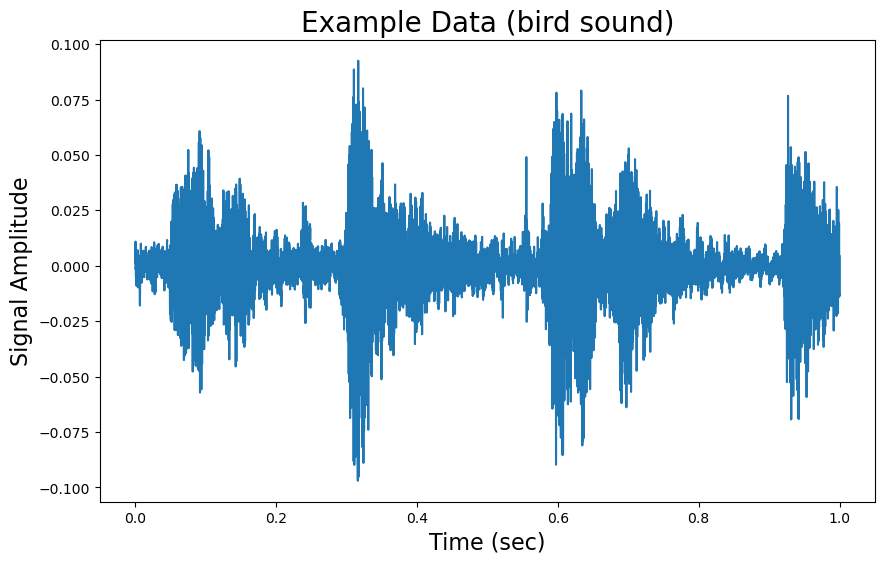

In [111]:
# y(새 울음소리 시각화)

# 1초 데이터 시각화 수식
x = [t / example_sr for t in range(len(y))]

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title('Example Data (bird sound)', fontsize=20)
plt.xlabel('Time (sec)', fontsize=16)
plt.ylabel('Signal Amplitude', fontsize=16)
plt.show()


In [ ]:
# window size = 2,048
# stride = 512

# 이렇게 하는걸로 가정한 것으로 추정됨

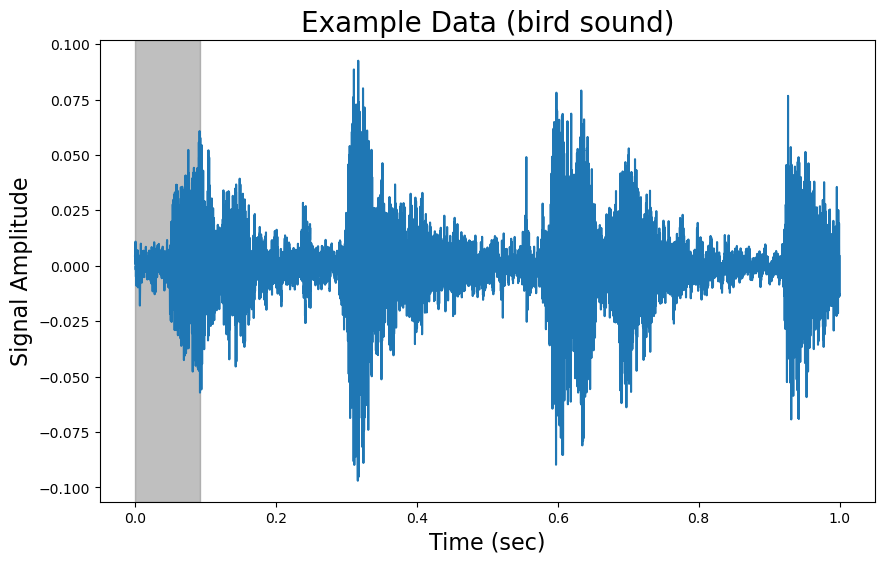

In [113]:
# 첫 번재 mel spectrogram 추출 - 그레이

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title('Example Data (bird sound)', fontsize=20)
plt.xlabel('Time (sec)', fontsize=16)
plt.ylabel('Signal Amplitude', fontsize=16)
plt.axvspan(xmin=0, xmax=2048 / example_sr, color='gray', alpha=0.5)

plt.show()

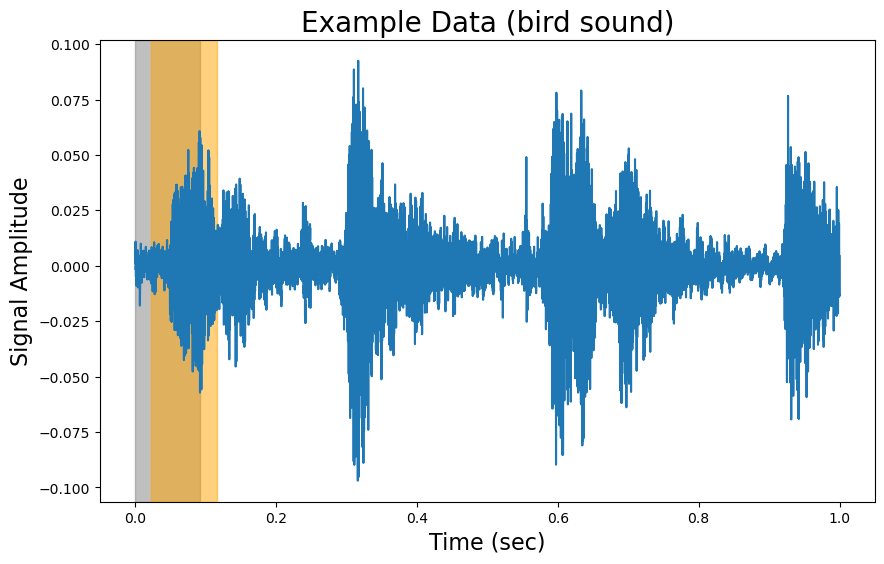

In [115]:
# 두 번재 mel spectrogram 추출 - 오렌지

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title('Example Data (bird sound)', fontsize=20)
plt.xlabel('Time (sec)', fontsize=16)
plt.ylabel('Signal Amplitude', fontsize=16)
plt.axvspan(xmin=0, xmax=2048 / example_sr, color='gray', alpha=0.5)
plt.axvspan(
    xmin=512 / example_sr, xmax=(2048 + 512) / example_sr,
    color='orange', alpha=0.5
)
plt.show()

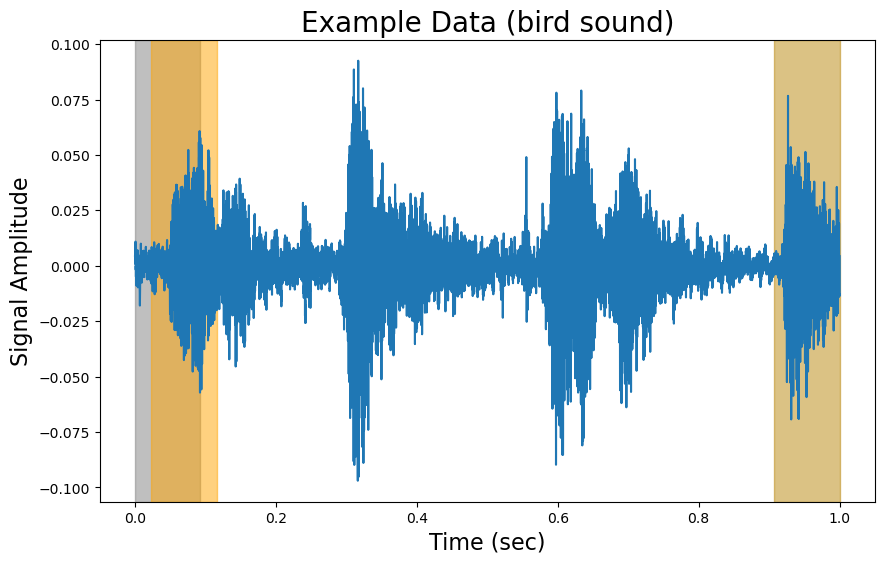

In [117]:
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title('Example Data (bird sound)', fontsize=20)
plt.xlabel('Time (sec)', fontsize=16)
plt.ylabel('Signal Amplitude', fontsize=16)
plt.axvspan(
    xmin=0, xmax=2048 / example_sr, color='gray', alpha=0.5
)
plt.axvspan(
    xmin=512 / example_sr, xmax=(2048 + 512 ) / example_sr,
    color='orange', alpha=0.5
)
plt.axvspan(
    xmin=(example_sr - 2048) / example_sr, xmax=example_sr / example_sr,
    color='darkgoldenrod', alpha=0.5
)
plt.show()

In [119]:
# mel spectrogram 추출 및 시각화

from librosa.display import specshow # Python의 librosa 라이브러리에서 제공하는 함수 중 하나로, **스펙트로그램(spectrogram)**과 같은 시간-주파수 표현을 시각화

S = librosa.feature.melspectrogram(y=y, sr=example_sr) # mel spectrogram 추출
S.shape

(128, 44)

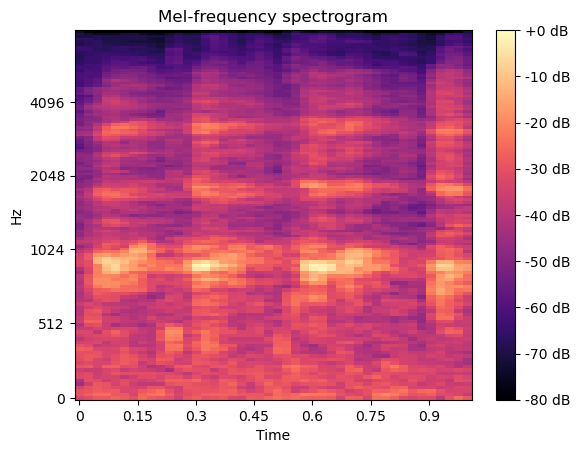

In [121]:
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max) # 파워 단위 -> 데시벨로 변환 why? 사람 달팽이관은 외부 소리를 로그형태로 변환하기 때문.
img = specshow(
    S_dB, x_axis='time', y_axis='mel',
    sr=example_sr, fmax=8000, ax=ax
)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')
plt.show()

In [ ]:
# 위의 그림 보면 -> 1024Hz와 2048Hz에서 소리가 가장 강력한 것으로 보여짐.

In [123]:
# 데이터 차원 변화 출력

print(
    f'1초 신호 데이터는 다음과 같이 변합니다.\
    \nBefore shape (signal) : {y.shape}\
    \nAfter shape (Mel Spectrogram) : {S_dB.shape}'
)

1초 신호 데이터는 다음과 같이 변합니다.    
Before shape (signal) : (22050,)    
After shape (Mel Spectrogram) : (128, 44)


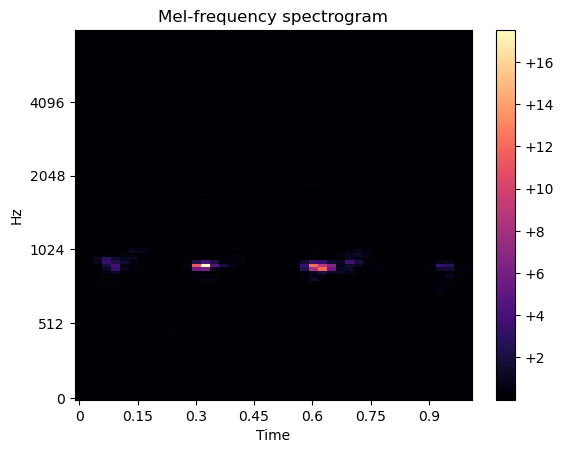

In [125]:
# 새 울음소리에서 추출한 Mel Spectrogram 단위: power

fig, ax = plt.subplots()
img = specshow(
    S, x_axis='time', y_axis='mel',
    sr=example_sr, fmax=8000, ax=ax
)
fig.colorbar(img, ax=ax, format='%+2.0f')
ax.set(title='Mel-frequency spectrogram')
plt.show()

In [ ]:
# 1024Hz 근방에서 보여지고 있음.

In [127]:
# 레이블 데이터 정리 -> wav와 txt파일 매칭시키기

from os import listdir
from os.path import join, splitext
import pandas as pd


label_path = '비명 감지 시스템 data/data/labels'
label_files = [
    f for f in listdir(label_path)
    if splitext(join(label_path, f))[-1] == '.txt'
]


print(
    f'label file 목록 예시 : {label_files[:3]}'
)

label file 목록 예시 : ['-42p_iyrthm.txt', '-flgshtdxq8.txt', '-l-vzbuvlgc.txt']


In [165]:
#0_2 이런 label이 있어서 그냥 0으로 치환하는 과정 포함

import pandas as pd
import os

list_file_fn = 'file_list.xlsx'
file_n = 0

# 텍스트 파일이 있는 디렉토리 경로를 label_path로 지정
label_path = '비명 감지 시스템 data/data/labels/'

with pd.ExcelWriter(list_file_fn) as writer:
    audio_names = []
    
    for i, file_name in enumerate(label_files):
        # 파일 이름에서 'labels-' 접두사 제거
        actual_file_name = file_name.replace('labels-', '')
        wav_file = actual_file_name[:-3] + 'wav'
        
        if wav_file not in os.listdir('비명 감지 시스템 data/data/raw_data/'):
            print(f"File {wav_file} not found in the directory.")
            continue
        
        try:
            # 올바른 경로를 사용하여 텍스트 파일을 읽음
            temp = pd.read_csv(os.path.join(label_path, actual_file_name), sep='\t', header=None)
            temp.columns = ['start(s)', 'end(s)', 'label']
            
            # label 열에서 "0_2"를 "0"으로 변경
            temp['label'] = temp['label'].replace(r'0_.*', '0', regex=True)
            
            temp.to_excel(writer, index=False, sheet_name=str(file_n))
            file_n += 1
            audio_names.append(wav_file)
        except FileNotFoundError as e:
            print(f"Error: {e}")
            continue

    if file_n == 0:
        pd.DataFrame({'No Data': []}).to_excel(writer, sheet_name='NoData')
    else:
        pd.DataFrame(audio_names, columns=['audio_name']).to_excel(writer, sheet_name='list')


In [139]:
#import pandas as pd
#import os

#list_file_fn = 'file_list.xlsx'
#file_n = 0

# 텍스트 파일이 있는 디렉토리 경로를 label_path로 지정
#label_path = '비명 감지 시스템 data/data/labels/'

#with pd.ExcelWriter(list_file_fn) as writer:
#    audio_names = []
    
#    for i, file_name in enumerate(label_files):
        # 파일 이름에서 'labels-' 접두사 제거
#        actual_file_name = file_name.replace('labels-', '')
#        wav_file = actual_file_name[:-3] + 'wav'
        
#        if wav_file not in os.listdir('비명 감지 시스템 data/data/raw_data/'):
#            print(f"File {wav_file} not found in the directory.")
#            continue
        
#        try:
            # 올바른 경로를 사용하여 텍스트 파일을 읽음
#            temp = pd.read_csv(os.path.join(label_path, actual_file_name), sep='\t', header=None)
#            temp.columns = ['start(s)', 'end(s)', 'label']
#            temp.to_excel(writer, index=False, sheet_name=str(file_n))
#            file_n += 1
#            audio_names.append(wav_file)
#        except FileNotFoundError as e:
#            print(f"Error: {e}")
#            continue

#    if file_n == 0:
#        pd.DataFrame({'No Data': []}).to_excel(writer, sheet_name='NoData')
#    else:
#        pd.DataFrame(audio_names, columns=['audio_name']).to_excel(writer, sheet_name='list')


In [167]:
import time
import math

import numpy as np
import pandas as pd
from tqdm import tqdm
import librosa
from torch.utils.data import Dataset, DataLoader

In [169]:
def load_label_data(file_path, i, frame_size):
    audio_label = pd.read_excel(file_path, sheet_name=str(i))  # (1)
    audio_label['label'] = audio_label['label'].apply(
        lambda x: int(str(x)[0])
    )
 
    audio_label = np.array(audio_label)  # (2)
    audio_label = audio_label[
        (audio_label[:, 1] - audio_label[:, 0] > frame_size)
    ]  # (3)
    return audio_label
 
def load_sound_data(file_path, sampling_rate):
    audio, sr = librosa.load(file_path, sr=sampling_rate)  # (4)
    return audio, sr

In [ ]:
# Feature Processing Function

In [171]:
def process_frame(audio, sr, label, frame_size=1, stride=0.2):
    n = np.sum(
        np.floor(
            (
                (label[:, 1] - label[:, 0]) - frame_size
            ) / stride + frame_size
        )
    )  # (1)
 
    frame_vector = np.zeros((int(n), frame_size * sr))  # (2)
    target_vector = np.zeros((int(n), 1))  # (3)
 
    i = 0
 
    for temp_label in label:  # (4)
        start = temp_label[0]  # (5)
        end = temp_label[1]  # (6)
        y = temp_label[2]  # (7)
 
        eter = int(
            np.floor((((end - start) - frame_size) / stride) + 1)
        )  # (8)
 
        for j in range(eter):  # (9)
            start_idx = int((start + j * stride) * sr)
            end_idx = start_idx + frame_size * sr
            frame_vector[i] = audio[start_idx:end_idx]  # (10)
            target_vector[i] = y  # (11)
            i += 1
    return frame_vector, target_vector

In [ ]:
# Feature Extraction 함수 (전체)

In [173]:
def extract_mel_feature(frame_vector, sr, n_mels, st=512):
    mel_feature = librosa.feature.melspectrogram(
        y=frame_vector, sr=sr, n_mels=n_mels, hop_length=st
    )  # (1)
    mel_feature = librosa.core.power_to_db(
        mel_feature, ref=np.max
    )  # (2)
    return mel_feature

In [175]:
def extract_mel_power_feature(frame_vector, sr, n_mels, st=512):
    mel_feature = librosa.feature.melspectrogram(
        y=frame_vector, sr=sr, n_mels=n_mels, hop_length=st
    )  # (1)
    return mel_feature

In [ ]:
# 데이터에 대한 Frame Processing 추출 수행

In [177]:
sr = 22050
frame_size = 1
stride = 0.2
n_mels = 64
n_feature = 34
short_time = 512
 
file_list = pd.read_excel('file_list.xlsx', sheet_name='list')  # (1)
 
frame_vectors = []
label_vectors = []
idx_count = []
 
for file_i, file_name in enumerate(file_list['audio_name']):  # (2)
    if file_i % 10 == 0:
        print(f'{file_i}-th 파일을 처리하고 있습니다.')
 
    label_data_temp = load_label_data(
        'file_list.xlsx', file_i, frame_size
    )  # (3)
 
    if len(label_data_temp) == 0:  # (4)
        idx_count.append(0)
        continue
 
    audio_path = '비명 감지 시스템 data/data/raw_data/' + file_name
    audio_data_temp, _ = load_sound_data(audio_path, sr)  # (5)
 
    frame_vector, label_vector = process_frame(
        audio=audio_data_temp, sr=sr, label=label_data_temp,
        frame_size=frame_size, stride=stride
    )  # (6)
    frame_vectors.append(frame_vector)
    label_vectors.append(label_vector)
    
    idx_count.append(frame_vector.shape[0])
    
frame_vectors = np.concatenate(frame_vectors)  # (7)
label_vectors = np.concatenate(label_vectors)

0-th 파일을 처리하고 있습니다.
10-th 파일을 처리하고 있습니다.
20-th 파일을 처리하고 있습니다.
30-th 파일을 처리하고 있습니다.
40-th 파일을 처리하고 있습니다.
50-th 파일을 처리하고 있습니다.
60-th 파일을 처리하고 있습니다.
70-th 파일을 처리하고 있습니다.
80-th 파일을 처리하고 있습니다.
90-th 파일을 처리하고 있습니다.
100-th 파일을 처리하고 있습니다.
110-th 파일을 처리하고 있습니다.
120-th 파일을 처리하고 있습니다.
130-th 파일을 처리하고 있습니다.
140-th 파일을 처리하고 있습니다.
150-th 파일을 처리하고 있습니다.
160-th 파일을 처리하고 있습니다.
170-th 파일을 처리하고 있습니다.


In [179]:
mel_features = []
for frame_vector in frame_vectors:
    mel_feature = extract_mel_feature(
        frame_vector=frame_vector, sr=sr, n_mels=n_mels
    )
    mel_features.append(mel_feature)
mel_features = np.stack(mel_features)
print(f'mel spectrogram shape: {mel_features.shape}')

mel spectrogram shape: (4554, 64, 44)


In [187]:
print(
    f'label vectors 의 shape: {label_vectors.shape}\
    \n비명 갯수 : {int(np.sum(label_vectors == 1))}\
    \n비명 아닌 갯수 : {int(np.sum(label_vectors == 0))}'
)


label vectors 의 shape: (4554, 1)    
비명 갯수 : 2106    
비명 아닌 갯수 : 2448


In [189]:
train_ratio = 0.7  # (1)

total_n = frame_vectors.shape[0]  # (2)
train_n = int(total_n * train_ratio)  # (3)

train_idxes = np.random.choice(total_n, train_n, replace=False)  # (4)

train_mask = np.zeros(shape=total_n, dtype=bool)  # (5)
train_mask[train_idxes] = True  # (6)

In [191]:
train_mel_features = mel_features[train_mask]
valid_mel_features = mel_features[~train_mask]

train_label_vectors = label_vectors[train_mask]
valid_label_vectors = label_vectors[~train_mask]

In [193]:
print(sum(train_label_vectors==0))
print(sum(train_label_vectors==1))

[1709]
[1478]


In [197]:
print(sum(valid_label_vectors==0))
print(sum(valid_label_vectors==1))

[739]
[628]


# Dataset과 DataLoder 관련 + 모델

In [199]:
# Dataset 커스텀

class ScreamDataset(Dataset):
    def __init__(self, x, y):
        self.audio_features = x
        self.labels = y
    
    def __len__(self):
        return len(self.audio_features)
    
    def __getitem__(self, idx):
        audio_feature = torch.FloatTensor(self.audio_features[idx])
        audio_feature = audio_feature.unsqueeze(0)
        label = self.labels[idx]
        return (audio_feature, label)

In [203]:
# 해당 파라미터 내용이 없어서 임의로 생성

batch_size = 64
learning_rate = 0.001
epochs = 20

In [205]:
train_dataset = ScreamDataset(
    train_mel_features, train_label_vectors
)  # (1)
train_loader = DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True
)  # (2)

In [207]:
valid_dataset = ScreamDataset(
    valid_mel_features, valid_label_vectors
)  # (1)
valid_loader = DataLoader(
    valid_dataset, batch_size=batch_size, shuffle=False
)  # (2)

In [ ]:
# Pytorch 모델 -> CNN 기반 + nn모듈

In [209]:
import torch
from torch import nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = nn.Sequential(
    # |x| = (n, 1, 64, 44)
    nn.Conv2d(
        in_channels=1,
        out_channels=32,
        kernel_size=(64, 1),
    ),
    # |x| = (n, 32, 1, 44)
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.Dropout2d(p=0.3),
    nn.Conv2d(
        in_channels=32,
        out_channels=64,
        kernel_size=(1, 9),
        stride=4
    ),
    # |x| = (n, 64, 1, 9)
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.Dropout2d(p=0.3),
    nn.Flatten(),
    # |x| = (n, 64 * 1 * 9)
    nn.Linear(64 * 1 * 9, 1),
    # |x| = (n, 1)
).to(device)

In [ ]:
# 모델 학습 -> 실제 모델학습

Epoch  01
      |   loss  |   acc  |   f1   |
TRAIN | 0.0204 | 0.992 | 0.992 |
VALID | 0.0615 | 0.982 | 0.979 |
----------------------------------

Epoch  02
      |   loss  |   acc  |   f1   |
TRAIN | 0.0254 | 0.991 | 0.990 |
VALID | 0.0888 | 0.974 | 0.968 |
----------------------------------

Epoch  03
      |   loss  |   acc  |   f1   |
TRAIN | 0.0309 | 0.988 | 0.986 |
VALID | 0.0592 | 0.983 | 0.933 |
----------------------------------

Epoch  04
      |   loss  |   acc  |   f1   |
TRAIN | 0.0303 | 0.990 | 0.988 |
VALID | 0.0743 | 0.976 | 0.970 |
----------------------------------

Epoch  05
      |   loss  |   acc  |   f1   |
TRAIN | 0.0424 | 0.986 | 0.985 |
VALID | 0.0682 | 0.984 | 0.979 |
----------------------------------

Epoch  06
      |   loss  |   acc  |   f1   |
TRAIN | 0.0320 | 0.987 | 0.985 |
VALID | 0.0581 | 0.985 | 0.937 |
----------------------------------

Epoch  07
      |   loss  |   acc  |   f1   |
TRAIN | 0.0375 | 0.987 | 0.985 |
VALID | 0.1269 | 0.967 | 0.960 |


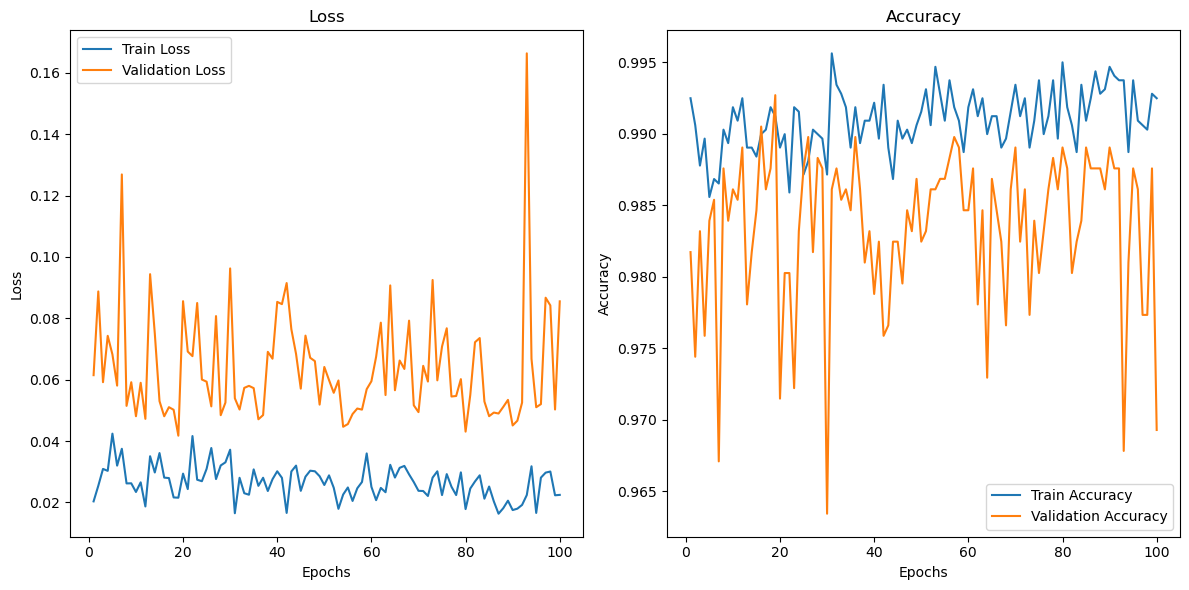

In [220]:
import torch
from torch import optim
from sklearn.metrics import f1_score, accuracy_score
import matplotlib.pyplot as plt

# 손실 함수 및 옵티마이저 설정
criterion = nn.BCEWithLogitsLoss()  # (1)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # (2)

# 리스트 초기화
train_losses = []
valid_losses = []
train_accuracies = []
valid_accuracies = []

train_n = len(train_dataset)
valid_n = len(valid_dataset)

for e in range(100):
    # 이 에포크에서 사용할 메트릭 초기화
    train_loss = 0
    train_acc = 0
    train_f1_score = 0
    valid_loss = 0
    valid_acc = 0
    valid_f1_score = 0
    
    # 훈련 과정
    model.train()  # (2)
    for audio_feature, label in train_loader:
        audio_feature = audio_feature.to(device)  # (3)
        label = label.to(device)
        optimizer.zero_grad()  # (4)
        
        pred = model(audio_feature)  # (5)
        
        loss = criterion(pred, label)  # (6)
        loss.backward()  # (7)
        optimizer.step()  # (8)

        pred = torch.round(torch.sigmoid(pred))  # (9)
        pred = pred.cpu().detach().numpy()  # (10)
        label = label.cpu().detach().numpy()

        acc = accuracy_score(label, pred)  # (11)
        f1 = f1_score(label, pred, zero_division=1)  # zero_division=1 적용

        n = len(label)  # (12)
        train_loss += loss.item() * n
        train_acc += acc * n
        train_f1_score += f1 * n

    # 검증 과정
    model.eval()
    with torch.no_grad():
        for audio_feature, label in valid_loader:
            audio_feature = audio_feature.to(device)
            label = label.to(device)
            
            pred = model(audio_feature)

            loss = criterion(pred, label)

            pred = torch.round(torch.sigmoid(pred))
            pred = pred.cpu().numpy()
            label = label.cpu().numpy()
            
            acc = accuracy_score(label, pred)
            f1 = f1_score(label, pred, zero_division=1)  # zero_division=1 적용

            n = len(label)
            valid_acc += acc * n
            valid_loss += loss.item() * n
            valid_f1_score += f1 * n

    # 이 에포크의 메트릭 계산
    train_loss = train_loss / train_n
    train_acc = train_acc / train_n
    train_f1_score = train_f1_score / train_n    
    valid_loss = valid_loss / valid_n
    valid_acc = valid_acc / valid_n
    valid_f1_score = valid_f1_score / valid_n

    # 메트릭을 리스트에 저장
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    train_accuracies.append(train_acc)
    valid_accuracies.append(valid_acc)

    # 메트릭 로그 출력
    print(f'Epoch {e+1 : 03}')
    print('      |   loss  |   acc  |   f1   |')
    print(f'TRAIN | {train_loss:.4f} | {train_acc:.3f} | {train_f1_score:.3f} |')
    print(f'VALID | {valid_loss:.4f} | {valid_acc:.3f} | {valid_f1_score:.3f} |')
    print('----------------------------------')
    print()

# 학습이 끝난 후 acc와 loss에 대한 plot 그리기
epochs = range(1, len(train_losses) + 1)

plt.figure(figsize=(12, 6))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, valid_losses, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, valid_accuracies, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [222]:
# 모델 저장

torch.save(model.cpu().state_dict(), 'test.pth')

In [224]:
# 모델 불러오기
from torch import nn
import torch

model = nn.Sequential(
    nn.Conv2d(
        in_channels=1,
        out_channels=32,
        kernel_size=(64, 1),
    ),
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.Dropout2d(p=0.3),
    nn.Conv2d(
        in_channels=32,
        out_channels=64,
        kernel_size=(1, 9),
        stride=4
    ),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.Dropout2d(p=0.3),
    nn.Flatten(),
    nn.Linear(64 * 1 * 9, 1),
)

model.load_state_dict(torch.load('test.pth', map_location='cpu'))

C:\Users\JaeJunChoi\AppData\Local\Temp\ipykernel_16820\1468024399.py:27: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('test.pth', map_locat

<All keys matched successfully>